In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [18]:
df_us_soft_pivot=pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_us_soft_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [11]:
df_US = df
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US.pivot_table(index='job_posted_month', columns="job_title_short", aggfunc='size')



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
December,4038,1152,13583,13303,12024,1254,1799,2878,2431,3841
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969


In [13]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns="job_title_short", aggfunc='size')


In [14]:
df_US_pivot.reset_index(inplace=True)


In [15]:
df_US_pivot['month_No'] = pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month


In [16]:
df_US_pivot.sort_values('month_No',inplace=True)

df_US_pivot.set_index('job_posted_month',inplace=True)

df_US_pivot.drop(columns='month_No',inplace=True)

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499


In [17]:
df_US_pivot.merge(df_us_soft_pivot, on='job_posted_month')

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122,13619,9827,5108,4348
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364,11456,9116,7298,4284
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692,11102,8178,5814,4159
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025,14037,9209,7232,4220
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969,12126,8864,6718,4980
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213,12003,8065,5902,4781
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663,11914,8061,6839,4344
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970,11571,8191,7413,4104
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499,14016,8447,6139,4094


In [20]:
df_US_merge = df_US_pivot.merge(df_us_soft_pivot, on='job_posted_month')


In [27]:
top_5 = (df_US_merge
         .sum()
         .sort_values(ascending=False)
         .head().index.to_list())

top_5

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Front-End Developer',
 'Back-End Developer']

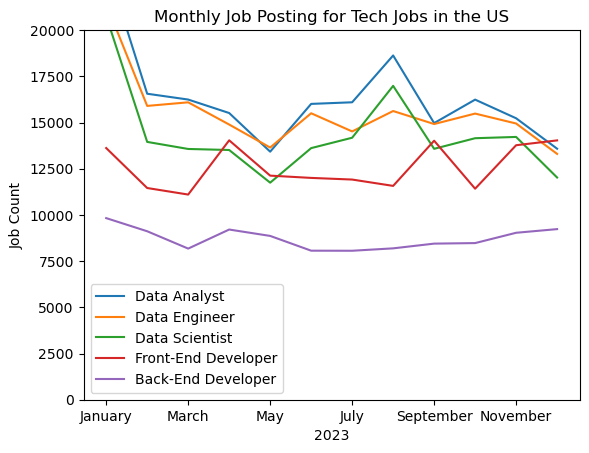

In [30]:
df_US_merge[top_5].plot(kind="line")
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.title('Monthly Job Posting for Tech Jobs in the US')
plt.show()